In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout


In [4]:
import yfinance as yf
import os

In [2]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/24/db/6ec78a4f10673a641cdb11694c2de2f64aa00e838551248cb11b8b057440/matplotlib-3.8.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/5b/ac/26fa1057f62beaa2af4c55c6ac733b114a403b746cfe0ce3dc6e4aec921a/contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/1a/26/837f5e58e90f53eab27acf30fc878a933d8ca8e35e1f2f82f9b39385f830/fonttools-4.49.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 759.9 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency 

In [2]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/24/db/6ec78a4f10673a641cdb11694c2de2f64aa00e838551248cb11b8b057440/matplotlib-3.8.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/5b/ac/26fa1057f62beaa2af4c55c6ac733b114a403b746cfe0ce3dc6e4aec921a/contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/1a/26/837f5e58e90f53eab27acf30fc878a933d8ca8e35e1f2f82f9b39385f830/fonttools-4.49.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 759.9 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency 

In [59]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/14/03/3c854ca3e02eedf614abba4b2e177c469bf3af58207fa30d5098c5d652fe/yfinance-0.2.37-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/bc/7e/4c66526e9b4f9c46afd7b2fef4482857d38752f2ee7cbb218816c5468251/lxml-5.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for appdirs>=1.4.4 from https://files.pythonhosted.org/packages/3b/00/2344469e2084fb287c2e0b57b72910309874c3245463acd6cf5e3db69324/appdirs-1.4.4-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to bu

In [5]:
from sklearn.metrics import precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier 


In [6]:
sp500 = pd.read_csv('/Users/riyajoshi/Downloads/sp500.csv')
sp500

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...,...
18287,2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,0,0
18288,2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,0,0
18289,2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,0,0
18290,2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,0,0,0


In [7]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Tomorrow"]

0          16.850000
1          16.930000
2          16.980000
3          17.080000
4          17.030001
            ...     
18287    3979.870117
18288    4006.179932
18289    4067.360107
18290    4107.279785
18291            NaN
Name: Tomorrow, Length: 18292, dtype: float64

In [100]:
sp500['Target'] = (sp500['adjClose'].shift(-1) > sp500['adjClose']).astype(int)

# Verify the 'Target' column has been created
print(sp500[['adjOpen', 'adjClose', 'Target']].head())

KeyError: 'adjClose'

In [101]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # 1 if tomorrow's value > today's values else 0 

In [102]:
# n_estimators: no of decision trees
# min_sample_split: prevents overfitting (if too high less accurate if too low overfitting)
# random_state: setting to 1, will keep the randomness same upon rerurring data
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [103]:
## Check Accuracy using Precision Score 
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.4523809523809524

<Axes: >

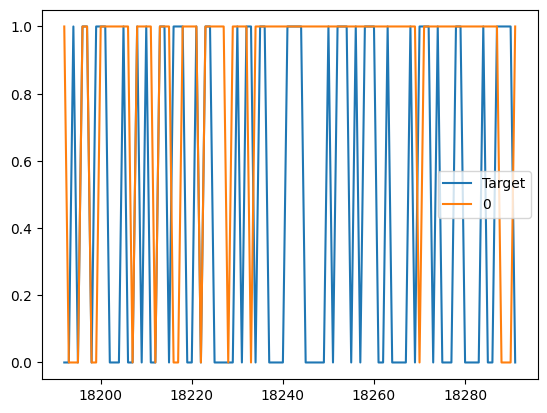

In [104]:
## Plot Actual values with predicted Values" 
# blue: actual
# orange: predictions 
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [105]:
# Create Prediction Function 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions") # combines model into series called Predictions
    combined = pd.concat([test["Target"], preds], axis=1) # combine data
    return combined

In [106]:
# Backtest Function 
# Trading year: 250 days
# Step: train each year 
# Start at 10th year i.e 2500th day (use 10th year data to predict 11th year data and so on)
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)


In [107]:
predictions = backtest(sp500, model, predictors)
print(predictions)

       Target  Predictions
2500        0            1
2501        1            1
2502        1            1
2503        0            0
2504        0            0
...       ...          ...
18287       1            0
18288       1            0
18289       1            0
18290       1            0
18291       0            1

[15792 rows x 2 columns]


In [76]:
predictions["Predictions"].value_counts()

Predictions
0    9070
1    6722
Name: count, dtype: int64

In [108]:
# Get Precision Score (0-1)
precision_score(predictions["Target"], predictions["Predictions"])

0.5230586135078845

In [89]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.528939
0    0.471061
Name: count, dtype: float64

In [111]:
horizons = [2,5,60,250,1000] # check intervals i.e trading days 2, 5, 3 months, 1 year etc 
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean() # calculate rolling avergae for horizon 

    # Add coloumn 
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"] # add this column to dataset 

    # Add column 
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] # sum of last few days  
    
    new_predictors += [ratio_column, trend_column] # predictors will contain these 2 new columns 

AttributeError: 'function' object has no attribute 'rolling'

In [112]:
sp500 = sp500.dropna 

AttributeError: 'function' object has no attribute 'dropna'

In [91]:
# Redefine model parameters
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [92]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [120]:
# Redefine Prediction Function with proba() function 

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    
    preds[preds>0.6] = 1
    preds[preds<0.6] = 0
    
    preds = pd.Series(preds, index=test.index, name="Predictions") # combines model into series called Predictions
    combined = pd.concat([test["Target"], preds], axis=1) # combine data
    return combined

# predictions = backtest(sp500, model, new_predictors)

In [121]:
preds = model.predict(test[predictors])

combined = pd.DataFrame(dict(actual=test["Target"], prediction=preds))

# Corrected code for creating the crosstab/confusion matrix
confusion_matrix = pd.crosstab(index=combined["actual"], columns=combined["prediction"], rownames=['Actual'], colnames=['Predicted'])

# Display the confusion matrix
print(confusion_matrix)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [113]:
def predict(data, model, predictors):
    # Assuming 'train' and 'test' are defined globally or passed as arguments is a bad practice
    # However, for the sake of this example, it's left as is
    model.fit(data[predictors], data["Target"])
    preds = model.predict(data[predictors])
    combined = pd.DataFrame({'Actual': data["Target"], 'Predicted': preds})
    return combined


# Backtesting means we train the algorithm on data from a certain time period
# and then test its performance on older data

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i]
        test = data.iloc[i:i+step] if i+step < data.shape[0] else data.iloc[i:]

        if test.empty:
            break

        
        combined = predict(test, model, predictors)
        all_predictions.append(combined)
        
    return pd.concat(all_predictions)

In [114]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Run the backtest
predictions = backtest(sp500, model, predictors, start=2, step=1)  # Adjust start and step for your dataset

# Optionally, evaluate the model's performance
accuracy = accuracy_score(predictions['Target'], predictions['Predicted'])
print(f"Accuracy: {accuracy:.2f}")

AttributeError: 'function' object has no attribute 'shape'

In [117]:
accuracy = accuracy_score(predictions['Target'], predictions['Predicted'])
print(f"Accuracy: {accuracy:.2f}")

KeyError: 'Predicted'

In [118]:
def predict(train, test, model, predictors):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    test['Predicted'] = preds  # Add predictions to the test set
    return test

In [ ]:
  # Using LTSM (RNN model)  

In [ ]:
# sklearn minmax scalar 

In [8]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [13]:
train_data = sp500.iloc[:-100]
test_data = sp500.iloc[-100:]

numeric_columns = sp500.select_dtypes(include=[np.number]).columns

# Apply this selection to your train and test data
train_data_numeric = train_data[numeric_columns]
test_data_numeric = test_data[numeric_columns] 

scaler = MinMaxScaler()
scaler.fit(train_data_numeric)
scaled_train = scaler.transform(train_data_numeric)
scaled_test = scaler.transform(test_data_numeric)

In [14]:
scaled_train 

array([[3.46757539e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.76578338e-05],
       [3.50712168e-03, 3.95672870e-05, 3.98877546e-05, ...,
        0.00000000e+00, 0.00000000e+00, 5.43946044e-05],
       [3.52377269e-03, 5.62271346e-05, 5.66825354e-05, ...,
        0.00000000e+00, 0.00000000e+00, 6.48549364e-05],
       ...,
       [9.26029987e-01, 9.25413759e-01, 9.18278614e-01, ...,
        0.00000000e+00, 0.00000000e+00, 9.15297190e-01],
       [9.12815271e-01, 9.14970127e-01, 9.13981200e-01, ...,
        0.00000000e+00, 0.00000000e+00, 9.30050672e-01],
       [9.13855960e-01, 9.27614907e-01, 9.18249194e-01, ...,
        0.00000000e+00, 0.00000000e+00, 9.29473302e-01]])

In [16]:
scaled_test[:2]

array([[0.93084622, 0.93120932, 0.93045269, 0.92947345, 0.32101121,
        0.        , 0.        , 0.91570938],
       [0.93436586, 0.93634263, 0.91695606, 0.91570956, 0.33458804,
        0.        , 0.        , 0.89021081]])

In [33]:
# using Keras TimeSeriesGenerator Function
import tensorflow
import keras
import tensorflow.python.keras.preprocessing.sequence 
from tensorflow.python.keras.preprocessing.sequence import TimeseriesGenerator

ModuleNotFoundError: No module named 'tensorflow.python.keras.preprocessing'

In [34]:
length = 250  # Length of the output sequences (in number of timesteps)
batch_size = 2500  # Number of timeseries samples in each batch

train_generator = TimeseriesGenerator(scaled_train, scaled_train,
                                      length=length, batch_size=batch_size)

test_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                     length=length, batch_size=batch_size)

NameError: name 'TimeseriesGenerator' is not defined

In [ ]:
model.fit(train_generator, epochs=25, validation_data=test_generator)

In [24]:
def timeseries_preprocessing(scaled_train, scaled_test, lags):
    X,Y = [],[]
    for t in range(len(scaled_train)-lags-1):
        X.append(scaled_train[t:(t+lags),0])
        Y.append(scaled_train[(t+lags),0])
    
    Z,W = [],[]
    for t in range(len(scaled_test)-lags-1):
        Z.append(scaled_test[t:(t+lags),0])
        W.append(scaled_test[(t+lags),0])
        
    X_train, Y_train, X_test, Y_test=np.array(X), np.array(Y), np.array(Z),np.array(W)
    X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
    X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
        
    return X_train, Y_train, X_test, Y_test
X_train, Y_train, X_test,Y_test=timeseries_preprocessing(scaled_train, scaled_test, 10)

In [26]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(256,input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [27]:
history = model.fit(x=X_train,y=Y_train,epochs=300,validation_data=(X_test,Y_test),shuffle=False)

Epoch 1/300
569/569 [==============================] - 5s 8ms/step - loss: 1.4169e-04 - val_loss: 3.3048e-04
Epoch 2/300
569/569 [==============================] - 4s 8ms/step - loss: 5.7864e-04 - val_loss: 4.9445e-04
Epoch 3/300
569/569 [==============================] - 5s 8ms/step - loss: 2.6076e-04 - val_loss: 3.6487e-04
Epoch 4/300
569/569 [==============================] - 4s 7ms/step - loss: 3.5169e-04 - val_loss: 2.5951e-04
Epoch 5/300
569/569 [==============================] - 4s 7ms/step - loss: 3.6891e-04 - val_loss: 2.6314e-04
Epoch 6/300
569/569 [==============================] - 4s 8ms/step - loss: 3.2695e-04 - val_loss: 2.9582e-04
Epoch 7/300
569/569 [==============================] - 4s 7ms/step - loss: 3.0387e-04 - val_loss: 2.6206e-04
Epoch 8/300
569/569 [==============================] - 4s 7ms/step - loss: 2.5250e-04 - val_loss: 3.0508e-04
Epoch 9/300
569/569 [==============================] - 4s 7ms/step - loss: 1.7290e-04 - val_loss: 2.2904e-04
Epoch 10/300
569/56

Text(0.5, 1.0, 'Model fitting performance')

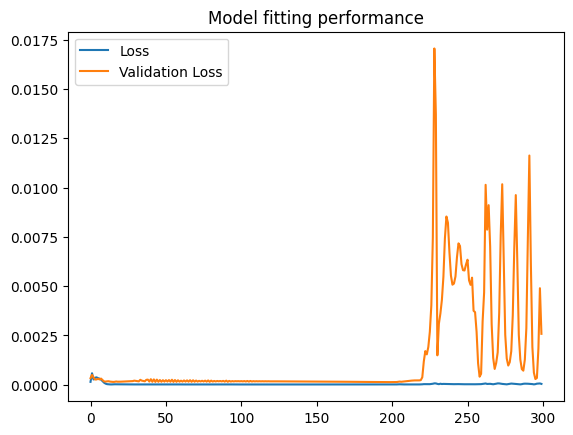

In [35]:
axes=plt.axes()
axes.plot(pd.DataFrame(model.history.history)['loss'], label='Loss')
axes.plot(pd.DataFrame(model.history.history)['val_loss'], label='Validation Loss')
axes.legend(loc=0)
axes.set_title('Model fitting performance')

In [48]:
Y_predicted=scaler.inverse_transform(model.predict(X_test))
Y_true=scaler.inverse_transform(Y_test.reshape(Y_test.shape[0],1))




3/3 [==============================] - 0s 7ms/step


ValueError: non-broadcastable output operand with shape (89,1) doesn't match the broadcast shape (89,8)

In [52]:
Y_predicted_inverse = scaler.inverse_transform(Y_predicted)

# For Y_test, reshape it to (89, 1) before inverse transformation
Y_true_reshaped = Y_test.reshape(-1, 1)
Y_true_inverse = scaler.inverse_transform(Y_true_reshaped)

ValueError: non-broadcastable output operand with shape (89,1) doesn't match the broadcast shape (89,8)

In [45]:
X_test.shape, Y_test.shape

((89, 10, 1), (89,))

In [53]:
scaler.fit(Y_train.reshape(-1, 1))

MinMaxScaler()

In [51]:
Y_predicted.shape

(89, 1)

In [37]:
axes.plot(Y_true, label='True Y')
axes.plot(Y_predicted, label='Predicted Y')
axes.legend(loc=0)
axes.set_title('Prediction adjustment')

NameError: name 'Y_true' is not defined

In [41]:
from sklearn import metrics
print('Model accuracy (%)')
Y_p=scaler.inverse_transform(model.predict(X_train))
Y_t=scaler.inverse_transform(Y_train.reshape(Y_train.shape[0],1))
print((1-(metrics.mean_absolute_error(Y_t, Y_p)/Y_t.mean()))*100)
print('')
print('Prediction performance')
print('MAE in %', (metrics.mean_absolute_error(Y_true, Y_predicted)/Y_true.mean())*100)
print('MSE', metrics.mean_squared_error(Y_true, Y_predicted))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_true, Y_predicted)))print('R2', metrics.r2_score(Y_true, Y_predicted))

SyntaxError: invalid syntax (3579948727.py, line 10)